In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
import os


# Define the path to the zip file and the extraction directory
zip_file_path = "/content/drive/MyDrive/archive (2).zip"
extract_dir = "/content"

# Check if the zip file exists
if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Error: '/content/drive/MyDrive/archive (2).zip' does not exist.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Paths
train_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'

# Image dimensions
img_size = 224
batch_size = 32

# Data Generators
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    horizontal_flip=True,
    validation_split=0.1
)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1
)

# Data Loading
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Load pre-trained MobileNet model
base_model = MobileNet(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Freeze base model

# Build Model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.2),
    Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for optimization
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train Model with optimized settings
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=5 ,  # Limit maximum epochs
    steps_per_epoch=100,  # Process only 100 batches per epoch
    validation_steps=50,  # Process only 50 batches for validation
    callbacks=[early_stopping]
)




FileNotFoundError: [Errno 2] No such file or directory: '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

In [ ]:
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

#precision = history.history['precision']
#val_precision = history.history['val_precision']

#recall =history.history['recall']
#val_recall =history.history['val_recall']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

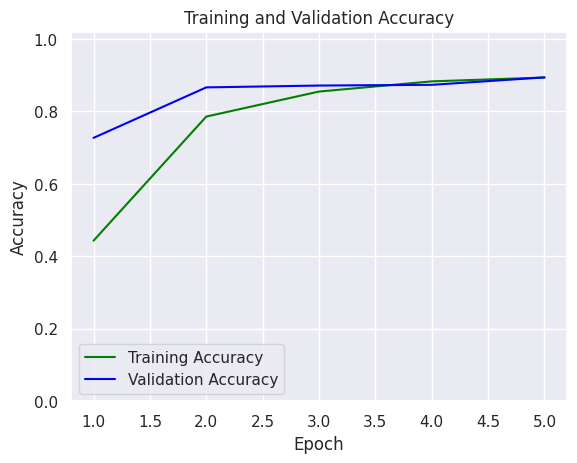

In [ ]:
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim(0,1.02)
plt.show()

In [ ]:
test='/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid'
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    preprocessing_function=None,
).flow_from_directory(test,
                      batch_size=164,
                      target_size=(224,224),
                      color_mode='rgb', #"rgb", "rgba", or "grayscale"
                      class_mode='categorical',  # Use 'binary', 'sparse','categorical' or None as needed
                      shuffle=False)

Found 17572 images belonging to 38 classes.


In [ ]:
model_evaluate = model.evaluate(test_generator)
print("Loss     : ",model_evaluate[0])
print("Accuracy : ",model_evaluate[1])
#print("Precision  : ",model_evaluate[2])
#print("Recall : ",model_evaluate[3])

108/108 ━━━━━━━━━━━━━━━━━━━━ 963s 9s/step - accuracy: 0.9420 - loss: 0.2283
Loss     :  0.31560876965522766
Accuracy :  0.9097996950149536


In [ ]:
model.save('CNN_plantdiseases_model.keras')

NameError: name 'model' is not defined